### A complete data exploration task
The following cells demonstrate a possible use of Pandas to perform data exploration and visualization using its internals.  
For this purpose, we'll be using a dataset about diamonds characteristics to show the basic steps of data exploration:

In [2]:
import pandas as pd
import numpy as np

filename = 'diamonds.csv'
dmds = pd.read_csv(filename)
data = dmds.copy()

data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


The <code>info</code> command displays the column names with their relevant data types and memory occupation for the loaded dataset.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


The <code>describe</code> method displays statistical information about the dataset for all numerical columns. As shown in the table below the categorical variables are disregarded by the function:

In [4]:
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Specific percentile values can be displayed by adding the list of desired percentiles in the <code>percentiles</code> parameter of the describe method:

In [5]:
percs = [.1, .3, .7, .9]
data.describe(percentiles=percs)

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
10%,0.310000,60.000000,55.000000,646.000000,4.360000,4.360000,2.690000
30%,0.420000,61.200000,56.000000,1087.000000,4.820000,4.830000,2.980000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
70%,1.010000,62.400000,58.000000,4662.000000,6.420000,6.420000,3.980000
90%,1.510000,63.300000,60.000000,9821.000000,7.310000,7.300000,4.520000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In order to display additional information about categorical variables an additional parameter should be specified to obtain record count, the number of unique values of each variable, the most frequent value and its occurrence count.

In [6]:
data.describe(include=object)

,cut,color,clarity
count,53940,53940,53940
unique,5,7,8
top,Ideal,G,SI1
freq,21551,11292,13065


In order to display the unique values for categorical features, the following command can be used:

In [7]:
data['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [8]:
data['color'].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [9]:
data['clarity'].unique()

array(['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF'],
      dtype=object)

One important transformation that might be useful for data manipulation is mapping all categorical variables into numerical equivalents. To do this, we first create the proper dictionaries:

In [10]:
cut_map = {v: c for c, v in enumerate(data['cut'].unique())}
color_map = {v: c for c, v in enumerate(data['color'].unique())}
clarity_map = {v: c for c, v in enumerate(data['clarity'].unique())}

In [11]:
cut_map, color_map, clarity_map

({'Ideal': 0, 'Premium': 1, 'Good': 2, 'Very Good': 3, 'Fair': 4},
 {'E': 0, 'I': 1, 'J': 2, 'H': 3, 'F': 4, 'G': 5, 'D': 6},
 {'SI2': 0,
  'SI1': 1,
  'VS1': 2,
  'VS2': 3,
  'VVS2': 4,
  'VVS1': 5,
  'I1': 6,
  'IF': 7})

Then we map the dataframe columns using the dictionaries to replace the textual values with the numerical ones:

In [12]:
data['cut'] = data['cut'].map(cut_map)
data['color'] = data['color'].map(color_map)
data['clarity'] = data['clarity'].map(clarity_map)
data.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,0,6,1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,2,6,1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,3,6,1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,1,3,0,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,0,6,0,62.2,55.0,2757,5.83,5.87,3.64


It is often necessary to clean the dataset from NaN values before applying any machine learning algorithm, therefore we first need to check and eventually count these values across the columns:

In [13]:
data.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

A summary of the number of occurrencies of each symbol in a colum in descending order is easily obtained by:

In [14]:
count = dmds['cut'].value_counts()
count

cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: count, dtype: int64

<Axes: ylabel='cut'>

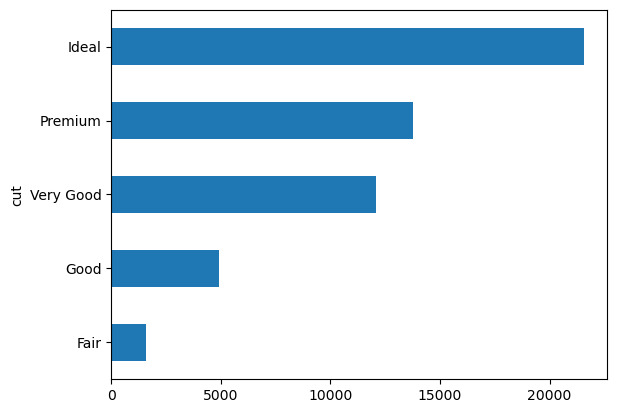

In [15]:
count.sort_values(ascending=True).plot(kind='barh')

A <code>group by</code> clause can be used to display more detailed information about a given column, preserving the natural ordering of the aggregation column, such as:

<Axes: xlabel='cut'>

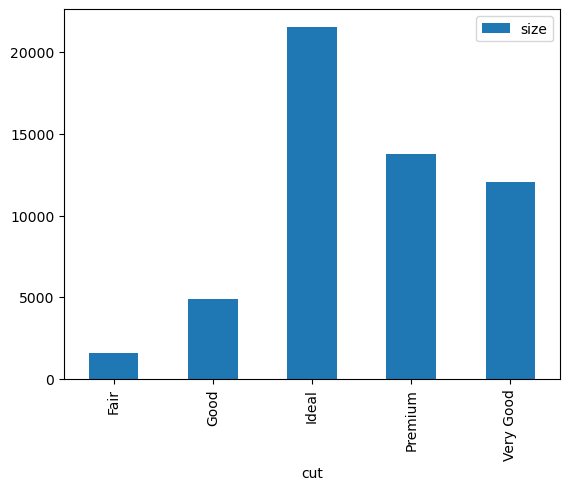

In [16]:
count = dmds.groupby(by='cut',as_index=False).size()
count.plot(kind='bar',x='cut',y='size')

Now we can filter out all diamonds that do not match our quality requirements by combining multiple conditions on the various columns: we select clarity **IF**, color **D** and cut **Ideal**.

In [17]:
topq = dmds[(data['carat'] > 1.0) & (data['clarity'] == 7) & (data['color'] == 6) & (data['cut'] == 0)]
topq

,carat,cut,color,clarity,depth,table,price,x,y,z
25622,1.04,Ideal,D,IF,61.8,57.0,14494,6.49,6.52,4.02
25718,1.04,Ideal,D,IF,61.8,57.0,14626,6.52,6.49,4.02
26198,1.02,Ideal,D,IF,63.0,57.0,15575,6.39,6.35,4.01
26311,1.06,Ideal,D,IF,61.2,57.0,15813,6.57,6.61,4.03
26965,1.07,Ideal,D,IF,60.9,54.0,17042,6.66,6.73,4.08
27226,1.03,Ideal,D,IF,62.0,56.0,17590,6.55,6.44,4.03


Hence the percentage of top quality diamonds can be calculated by means of:

In [18]:
print('The top quality diamonds percentage is {:.3f} at the average price of {:.2f}$.'.format(topq.size/dmds.size*100,topq['price'].mean()))

The top quality diamonds percentage is 0.011 at the average price of 15856.67$.


Now let's visualize the diamonds with a pivot table to create a hierarchical view by clarity, color and cut:

In [19]:
thepivot = dmds.pivot_table(values=['carat','price'],index=['clarity','color','cut'],aggfunc=np.sum)
thepivot

/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T/ipykernel_59353/302190639.py:1: FutureWarning: The provided callable <function sum at 0x10c9576a0> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  thepivot = dmds.pivot_table(values=['carat','price'],index=['clarity','color','cut'],aggfunc=np.sum)


carat   price
clarity color cut                     
I1      D     Fair        7.51   29532
              Good        8.32   27926
              Ideal      12.48   45850
              Premium    13.86   45825
              Very Good   4.75   13114
...                        ...     ...
VVS2    J     Fair        1.01    2998
              Good       12.18   56825
              Ideal      47.01  222584
              Premium    42.57  218394
              Very Good  31.96  172853

[276 rows x 2 columns]

The pivot table is organized as a multi-index dataframe, whose data can be accessed through the <code>.loc</code> as shown in the cell below that reports the total carats and price of all top quality diamonds:

In [20]:
thepivot.loc['IF','D','Ideal']

carat        17.24
price    183881.00
Name: (IF, D, Ideal), dtype: float64

As already shown in the present example, pandas provides its own data plotting features, but it is still possible to extend the plots variety by means of additional packages, such as **seaborn** that will be discussed in further detail in lecture #5.

The following figure displays violin plots for some important features of our dataset.

<Axes: >

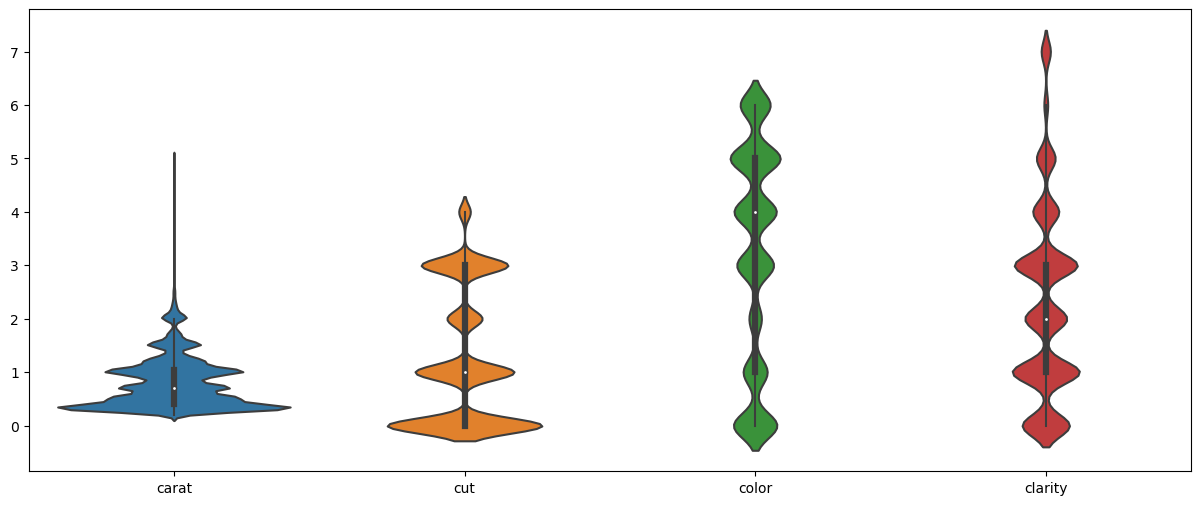

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,6))
sns.violinplot(data=data.loc[:,['carat','cut','color','clarity']], ax=ax)

Finally, it is possible to calculate the correlation matrix, a symmetric matrix that shows the correlation among pairs of data features: values close to 1.0 highlight strong positive correlation between the selected features meaning that both features move in the same direction, whereas negative values imply variations in opposite directions.

In [22]:
data.loc[:,['carat','cut','color','clarity']].corr()

,carat,cut,color,clarity
carat,1.000000,0.114426,-0.065386,-0.281218
cut,0.114426,1.000000,-0.029128,-0.118670
color,-0.065386,-0.029128,1.000000,0.032589
clarity,-0.281218,-0.118670,0.032589,1.000000


# Assignment
Following the example provided above, perform a complete data exploration task on the supplied <code>covid19_cases.csv</code>, trying to extract and plot significant information about the geographical incidence of the virus and focusing on an area of your particular interest.


In [35]:
Data = pd.read_csv('covid19_cases.csv')
df = Data.copy()
print(df.shape)
df.head() 

(58690, 12)


,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,29/11/2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110
1,28/11/2020,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650
2,27/11/2020,27,11,2020,0,0,Afghanistan,AF,AFG,38041757.0,Asia,6.395604
3,26/11/2020,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932
4,25/11/2020,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,7.199983


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58690 entries, 0 to 58689
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     58690 non-null  object        
 1   day                                                         58690 non-null  int64         
 2   month                                                       58690 non-null  int64         
 3   year                                                        58690 non-null  int64         
 4   cases                                                       58690 non-null  int64         
 5   deaths                                                      58690 non-null  int64         
 6   countriesAndTerritories                                     58690 non-null  object        
 7   geoId                 

In [13]:
df.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                          260
countryterritoryCode                                           108
popData2019                                                    108
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2864
Date                                                             0
dtype: int64

In [14]:
df.describe(include='all')

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date
count,58690,58690.000000,58690.000000,58690.000000,58690.000000,58690.000000,58690,58430,58582,5.858200e+04,58690,55826.000000,58690
unique,335,NaN,NaN,NaN,NaN,NaN,214,213,212,NaN,6,NaN,NaN
top,11/11/2020,NaN,NaN,NaN,NaN,NaN,South_Korea,CZ,KOR,NaN,Europe,NaN,NaN
freq,213,NaN,NaN,NaN,NaN,NaN,335,335,335,NaN,16547,NaN,NaN
mean,NaN,15.986386,6.801261,2019.998858,1061.016033,24.766246,NaN,NaN,NaN,4.125423e+07,NaN,59.561624,2020-07-10 00:29:35.402964480
min,NaN,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,NaN,NaN,NaN,8.150000e+02,NaN,-147.419587,2019-12-31 00:00:00
25%,NaN,8.000000,5.000000,2020.000000,0.000000,0.000000,NaN,NaN,NaN,1.324820e+06,NaN,0.674518,2020-05-03 00:00:00
50%,NaN,16.000000,7.000000,2020.000000,14.000000,0.000000,NaN,NaN,NaN,7.813207e+06,NaN,6.339297,2020-07-13 00:00:00
75%,NaN,24.000000,9.000000,2020.000000,245.000000,4.000000,NaN,NaN,NaN,2.860872e+07,NaN,47.009641,2020-09-21 00:00:00
max,NaN,31.000000,12.000000,2020.000000,207913.000000,4928.000000,NaN,NaN,NaN,1.433784e+09,NaN,1900.836210,2020-11-29 00:00:00


### Here Goes for Cleaning (WIP)

- Dates are not represented as date type
- Null data in `geoID` and `countryterritoryCode` seems to be not an important issue as we can find them out by other filled na. (need depth analysis)
- `pop data` null seems to be the same as `countryterritoryCode` so there might be a solution in impute the null data.
- `Cumulative_number_for_14_days_of_COVID-19_cases_per_100000` can be relcalucated to avoid this incomplete data

- We have negative numbers in `Cases` and `death` which doesn't make sense. also there are rows with `Cases` less than `Death`. so they need to be removed


In [64]:
df['Date'] = pd.to_datetime(df['dateRep'])


/var/folders/2n/xc_5x6ys00q7kj5lcfn2s10r0000gn/T/ipykernel_60357/396793767.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['Date'] = pd.to_datetime(df['dateRep'])


In [85]:
df[df['cases'] < df['deaths']].shape

(272, 14)

In [88]:
df_temp1 = df[df['cases'] > df['deaths']]

In [89]:
df_temp1[(df_temp1['cases'] < 0 ) | (df_temp1['deaths'] < 0 )].shape 

(0, 14)

In [90]:
#Checkpoint
df_cleaned = df_temp1.copy()
df = df_cleaned.copy()

In [91]:
df['Death/Case(%)'] = (df['deaths']) / (df['cases'] + 0.00000000000000000001) * 100# to avoid deviding over zero

In [92]:
df.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date,Death/Case(%)
0,29/11/2020,29,11,2020,228,11,Afghanistan,AF,AFG,38041757.0,Asia,6.845110,2020-11-29,4.824561
1,28/11/2020,28,11,2020,214,15,Afghanistan,AF,AFG,38041757.0,Asia,6.784650,2020-11-28,7.009346
3,26/11/2020,26,11,2020,200,12,Afghanistan,AF,AFG,38041757.0,Asia,7.341932,2020-11-26,6.000000
4,25/11/2020,25,11,2020,185,13,Afghanistan,AF,AFG,38041757.0,Asia,7.199983,2020-11-25,7.027027
5,24/11/2020,24,11,2020,246,17,Afghanistan,AF,AFG,38041757.0,Asia,6.713675,2020-11-24,6.910569


In [178]:
df.describe()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,Date,Death/Case(%)
count,39842.000000,39842.000000,39842.000000,39842.000000,39842.000000,3.982400e+04,38731.000000,39842,39842.000000
mean,16.060138,7.184705,2019.999975,1563.176999,36.260102,5.088811e+07,78.005559,2020-07-22 03:53:05.081070336,2.767686
min,1.000000,1.000000,2019.000000,1.000000,0.000000,8.150000e+02,-147.419587,2019-12-31 00:00:00,0.000000
25%,9.000000,5.000000,2020.000000,13.000000,0.000000,3.461731e+06,2.757660,2020-05-16 00:00:00,0.000000
50%,16.000000,7.000000,2020.000000,90.000000,1.000000,1.064980e+07,15.979454,2020-07-25 00:00:00,0.714286
75%,24.000000,9.000000,2020.000000,585.000000,10.000000,3.647177e+07,79.980423,2020-09-28 00:00:00,2.763634
max,31.000000,12.000000,2020.000000,207913.000000,4928.000000,1.433784e+09,1900.836210,2020-11-29 00:00:00,90.000000
std,8.777788,2.553932,0.005010,7273.488444,150.541298,1.736401e+08,164.288745,NaN,6.253446


### Data Vis

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt 
sns.set_theme()

<Axes: xlabel='cases', ylabel='deaths'>

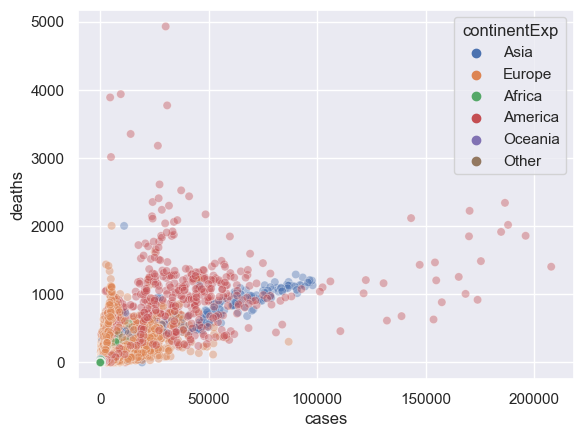

In [180]:
sns.scatterplot(df, x='cases', y='deaths', hue='continentExp', alpha = 0.4)

#### Trends Over Time

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


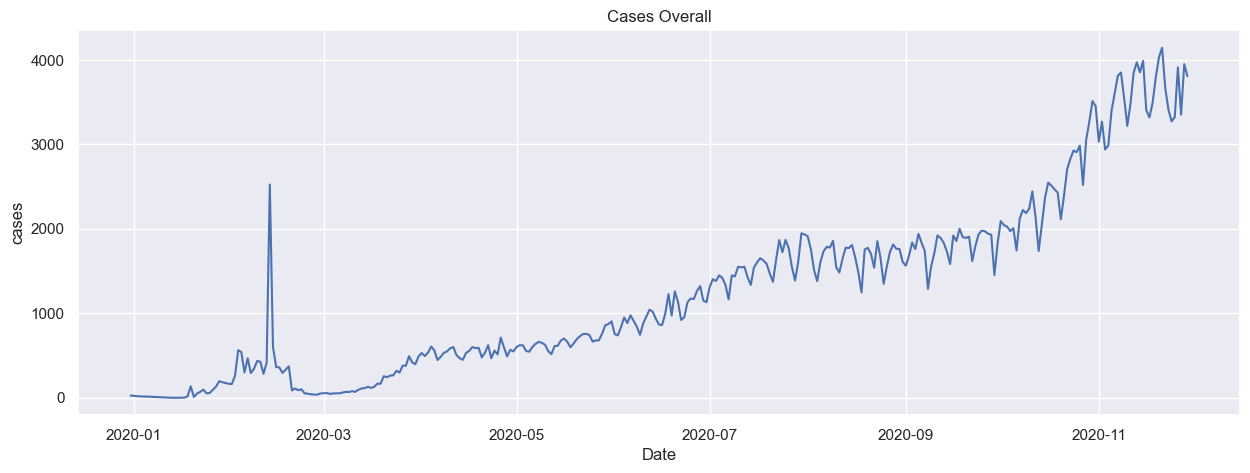

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


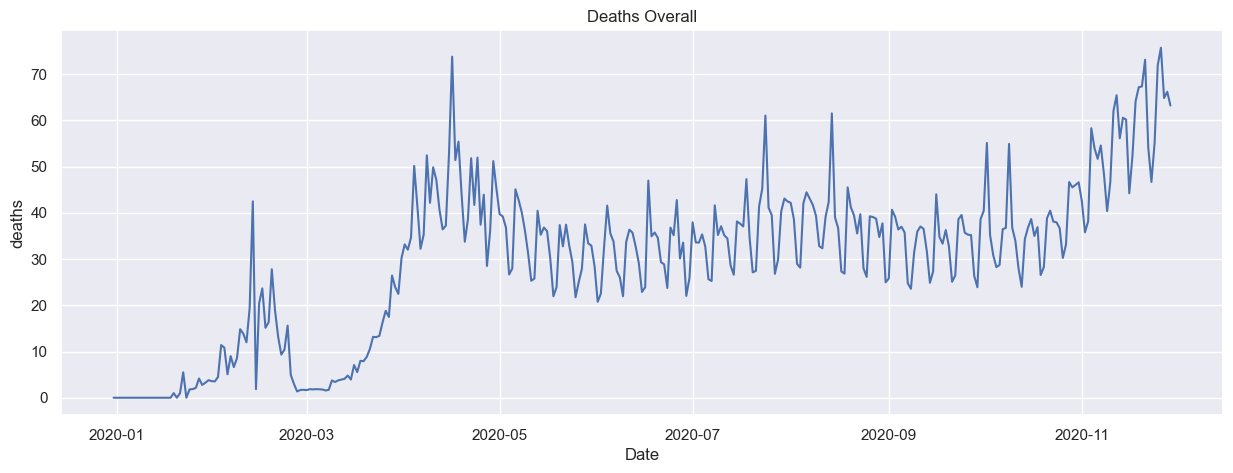

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


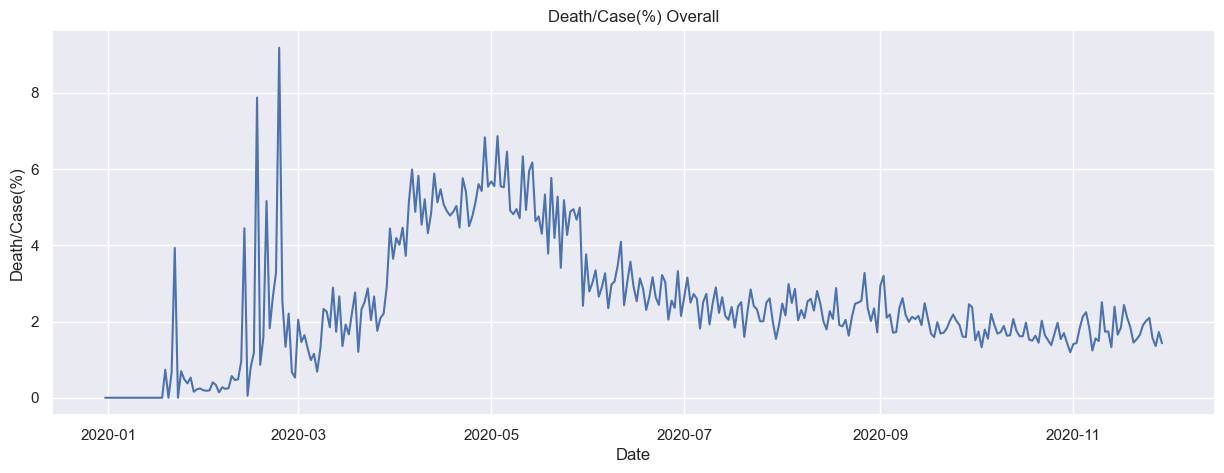

In [119]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='cases', errorbar=None)
plt.title('Cases Overall')
plt.show()

plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='deaths',  errorbar=None )
plt.title('Deaths Overall')
plt.show()

plt.figure(figsize=(15, 5))
sns.lineplot(data=df[df['continentExp'] != 'Oceania'], x='Date', y='Death/Case(%)',  errorbar=None ) #except oceanea as it's noisy
plt.title('Death/Case(%) Overall')
plt.show()

D/C Decreased over time but absolute number of people increased tremendously


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


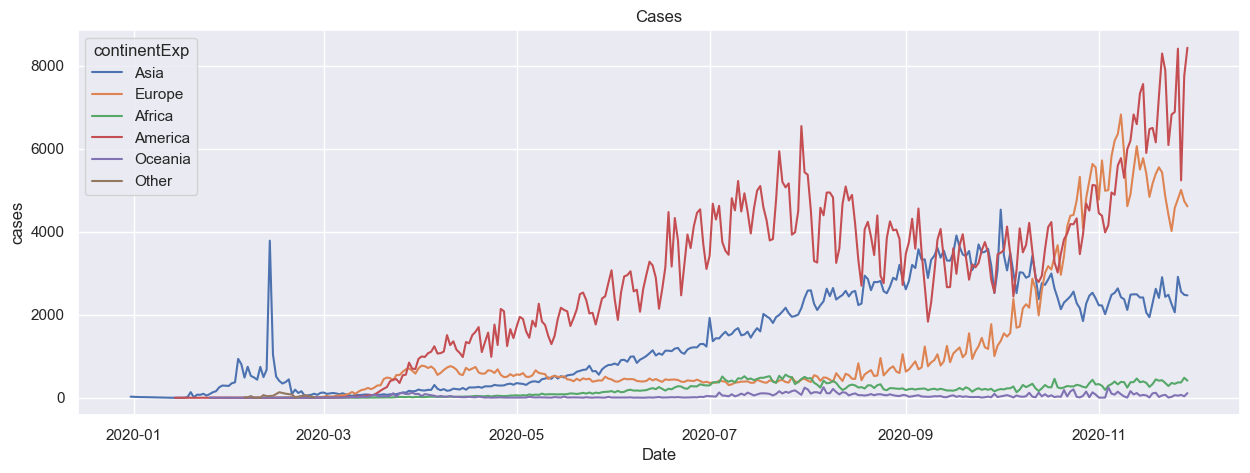

/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


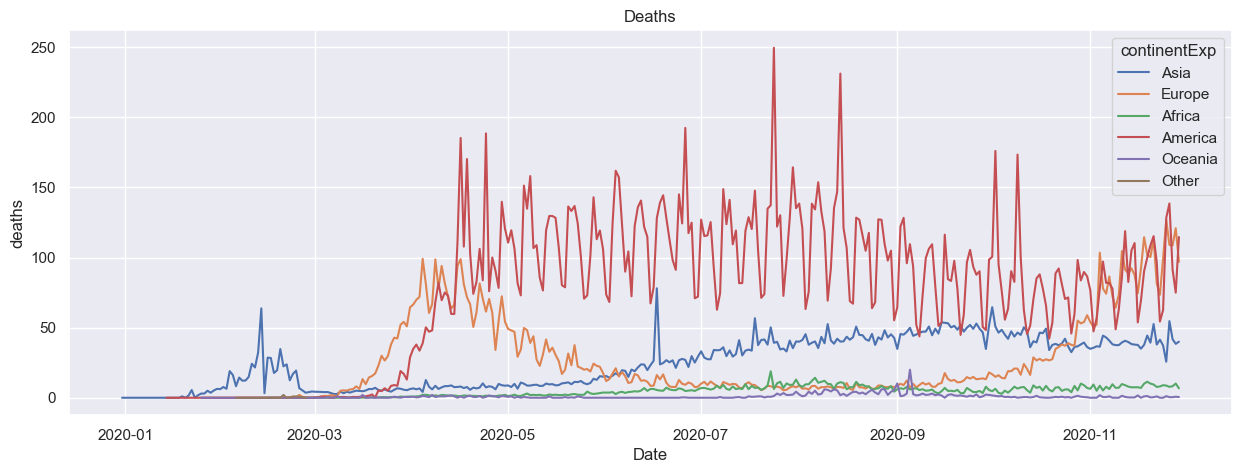

In [113]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='cases', hue='continentExp', errorbar=None)
plt.title('Cases')
plt.show()

plt.figure(figsize=(15, 5))
sns.lineplot(data=df, x='Date', y='deaths', hue='continentExp', errorbar=None )
plt.title('Deaths')
plt.show()

? patterns in America?

? The first hype in Asia? 

oceanea is so small so just ignore it.


/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Applications/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


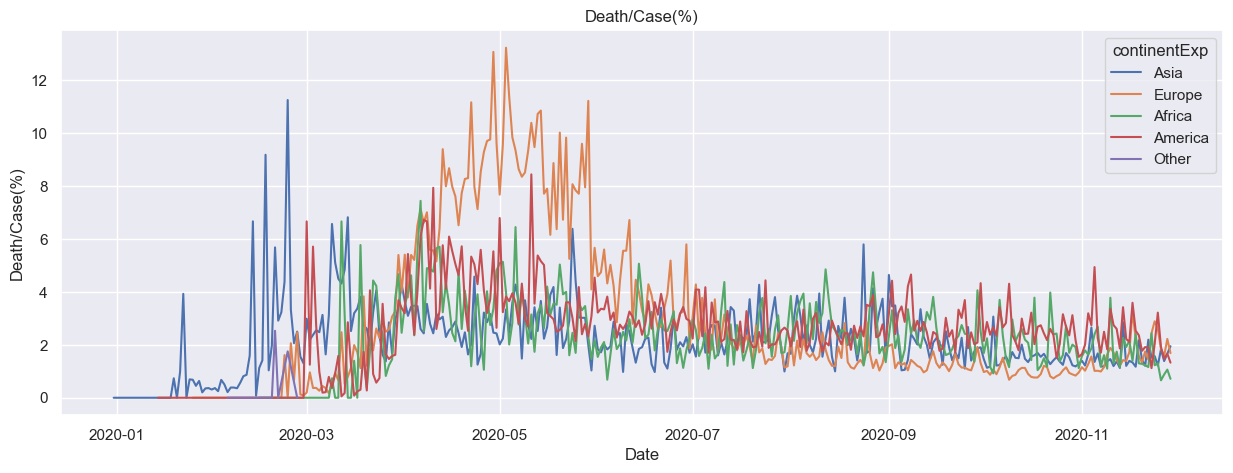

In [118]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=df[df['continentExp'] != 'Oceania'], x='Date', y='Death/Case(%)', hue='continentExp', errorbar=None ) #except oceanea as it's noisy
plt.title('Death/Case(%)')
plt.show()

#### Top Locations

In [196]:
temp1 = df.groupby('continentExp')[['deaths', 'cases']].sum().reset_index()
temp1['Ratio'] = temp1['deaths'] / temp1['cases'] *100

temp1.sort_values(by='Ratio', ascending= False, inplace= True)
temp1

,continentExp,deaths,cases,Ratio
1,America,718468,26637448,2.697210
0,Africa,51072,2150797,2.374562
3,Europe,404177,17836240,2.266044
4,Oceania,1094,51292,2.132886
2,Asia,269861,15603616,1.729477
5,Other,3,705,0.425532


Text(0.5, 1.0, 'deaths')

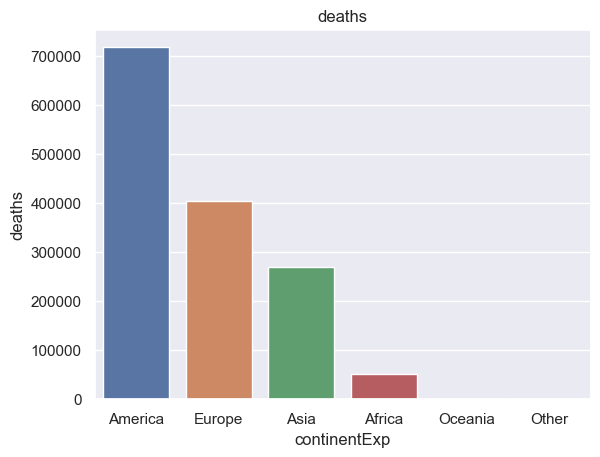

In [214]:
sns.barplot(temp1.sort_values(by='deaths', ascending= False), x='continentExp', y='deaths')
plt.title('deaths')

? why Asia has the least amount? it doesn't make sense.

In [202]:
temp2 = df[df['continentExp'] == 'America' ].groupby('countriesAndTerritories')[['deaths', 'cases']].sum().reset_index()
temp2['Ratio'] = temp2['deaths'] / temp2['cases'] *100

temp2.sort_values(by='Ratio', ascending= False).head(10)


,countriesAndTerritories,deaths,cases,Ratio
31,Mexico,105040,1100303,9.546461
8,Bolivia,7339,144064,5.094264
21,Ecuador,9438,203161,4.645577
36,Peru,35879,960368,3.735964
26,Guatemala,4133,121792,3.393491
12,Canada,11976,364810,3.282805
15,Colombia,36401,1299613,2.800911
14,Chile,15322,548941,2.791192
10,Brazil,172561,6290272,2.743299
2,Argentina,38182,1413361,2.701504


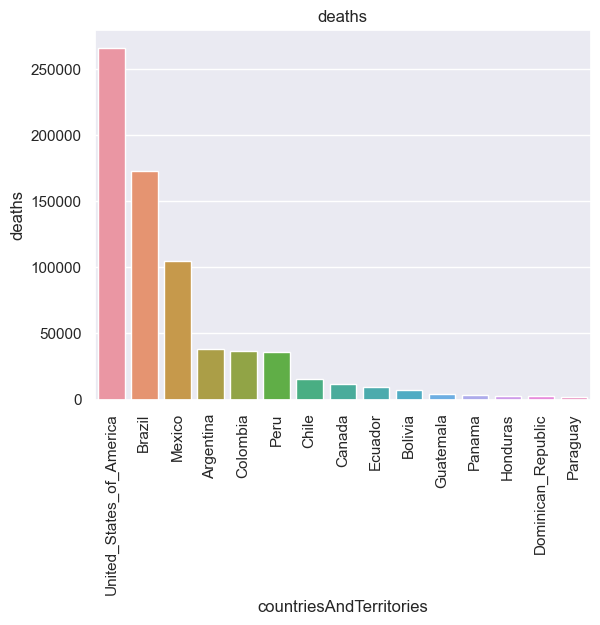

In [213]:
sns.barplot(temp2.sort_values(by='deaths', ascending= False).head(15), x='countriesAndTerritories', y='deaths')
plt.title('deaths')
plt.xticks(rotation = 90)
plt.show()